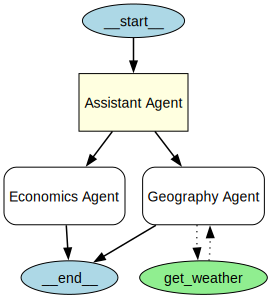

In [8]:
from agents import Agent, Runner, SQLiteSession, function_tool
from agents.extensions.visualization import draw_graph

session = SQLiteSession(session_id="user_4", db_path="ai-memory.db")


@function_tool
def get_weather(city: str) -> str:
    return "30 degrees"


geography_agent = Agent(
    name="Geography Agent",
    model="gpt-5-nano-2025-08-07",
    instructions="You are a geography agent. Answer the user's question about geography.",
    handoff_description="You are a geography agent. Answer the user's question about geography.",
    tools=[get_weather],
)

economics_agent = Agent(
    name="Economics Agent",
    model="gpt-5-nano-2025-08-07",
    instructions="You are a economics agent. Answer the user's question about economics.",
    handoff_description="You are a economics agent. Answer the user's question about economics.",
)


main_agent = Agent(
    name="Assistant Agent",
    model="gpt-5-nano-2025-08-07",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[geography_agent, economics_agent],
)

draw_graph(main_agent)


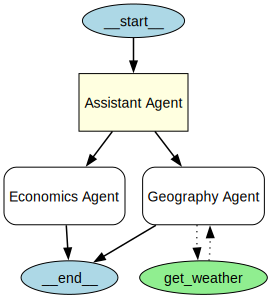

In [ ]:
result = await Runner.run(
    main_agent,
    "Why do countries sell bonds?",
    session=session,
)


In [ ]:
print(result.last_agent.name)
print(result.final_output)

Economics Agent
Countries sell bonds primarily to borrow money to fund government spending and operations. Here are the main reasons:

- Financing deficits: When a government's expenditures exceed its revenues, it runs a budget deficit. Issuing bonds allows it to borrow to cover the shortfall without raising taxes immediately.
- Smoothting receipts: Tax revenues are often uneven over the year. Bond issuance provides a predictable stream of funds to cover ongoing expenses even when revenue is temporarily low.
- Public investment: Governments borrow to finance long-term investments (infrastructure, education, research) that can boost future growth and productivity.
- Stabilization and management of debt: Issuing bonds helps manage the debt maturity profile, spreading repayments over time to avoid a large lump-sum payment that could disrupt fiscal stability.
- Monetary policy considerations: In some cases, bond issuance interacts with monetary policy. Central banks may buy or sell governm